In [1]:
import gpforecaster as gpf
import htsmodels as hts
import tsaugmentation as tsag
import matplotlib.pyplot as plt
import os

/home/mach1ne/anaconda3/envs/phd_ver/lib/python3.7/site-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [2]:
dataset_name = 'prison'
dataset = tsag.preprocessing.PreprocessDatasets('prison')
groups = dataset.apply_preprocess()

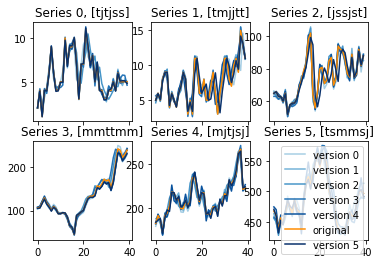

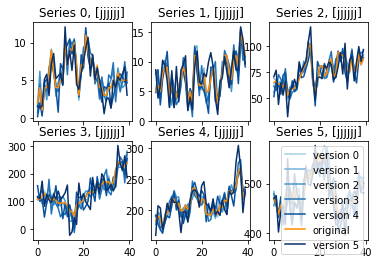

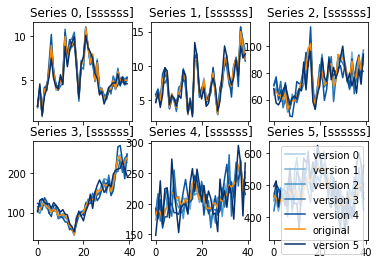

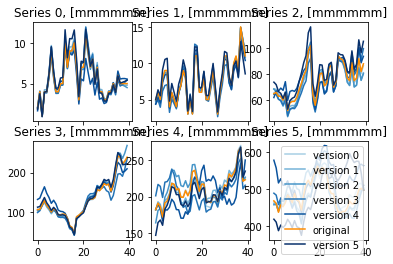

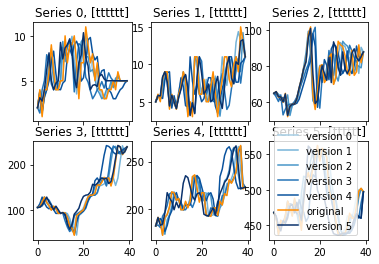

In [3]:
prison = tsag.transformations.CreateTransformedVersions('prison')
prison.create_new_version_single_transf()

In [5]:
vis = tsag.visualization.Visualizer('prison')

In [12]:
algorithm = 'gpf'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            gpf_model = gpf.model.GPF(f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups)
            model, like = gpf_model.train()
            mean, lower, upper = gpf_model.predict(model, like)
            res = gpf_model.metrics(mean)
            gpf_model.store_metrics(res)

KeyboardInterrupt: 

In [ ]:
algorithm = 'mint'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            mint = hts.models.MinT(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            forecasts = mint.train()
            results = mint.results(forecasts)
            res = mint.metrics(results)
            mint.store_metrics(res)

R[write to console]: ── Attaching packages ────────────────────────────────────────────── fpp3 0.3 ──

R[write to console]: ✔ tibble      3.0.4       ✔ tsibble     0.9.3  
✔ dplyr       1.0.2       ✔ tsibbledata 0.2.0  
✔ tidyr       1.1.2       ✔ feasts      0.1.6  
✔ lubridate   1.7.9.2     ✔ fable       0.2.1  
✔ ggplot2     3.3.2       

R[write to console]: ── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()   masks base::date()
✖ dplyr::filter()     masks stats::filter()
✖ tsibble::interval() masks lubridate::interval()
✖ dplyr::lag()        masks stats::lag()

/home/mach1ne/anaconda3/envs/phd_ver/lib/python3.7/site-packages/htsmodels/models/mint.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [ ]:
algorithm = 'deepar'
for k in ['jitter', 'scaling', 'magnitude_warp', 'time_warp']:
    vis._read_files(f'single_transf_{k}')
    for i in range(6):
        for j in range(10):
            groups['train']['data'] = vis.y_new[i, j]
            deepar = hts.models.DeepAR(dataset=f'{dataset_name}_{algorithm}_{k}_v{i}_s{j}', groups=groups)
            model = deepar.train()
            forecasts = deepar.predict(model)
            results = deepar.results(forecasts)
            res = deepar.metrics(results)
            deepar.store_metrics(res)